In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.metrics import f1_score
import pandas as pd
from collections import defaultdict

In [2]:
#def get_0_prune_results(folder_name, score_folder):
#    no_prune = {'macro': defaultdict(list), 'micro': defaultdict(list), 'binary': defaultdict(list), 'weighted': defaultdict(list)}
#    for run_num in (1, 2, 3, 4, 5):
#        df = pd.read_csv(os.path.join(folder_name, f'0_prune_results_run_{run_num}.csv'))
#        macro_score = f1_score(y_true = df['numeric_labels'], y_pred = df['pred_numeric_labels'], average = 'macro')
#        micro_score = f1_score(y_true = df['numeric_labels'], y_pred = df['pred_numeric_labels'], average = 'micro')
#        binary_score = f1_score(y_true = df['numeric_labels'], y_pred = df['pred_numeric_labels'], average = 'binary')
#        weighted_score = f1_score(y_true = df['numeric_labels'], y_pred = df['pred_numeric_labels'], average = 'weighted')
#        o_prune['macro'][0].append(macro_score)
#        no_prune['micro'][0].append(micro_score)
#        no_prune['binary'][0].append(binary_score)
#        no_prune['weighted'][0].append(weighted_score)
#    with open(os.path.join(score_folder, '0_prune_all_scores.json'), 'w') as score_file:
#        json.dump(no_prune, score_file)

In [3]:
#get_0_prune_results('sexism_data_results', 'sexism_data_f1_scores')
#get_0_prune_results('sexism_eval_results', 'sexism_eval_f1_scores')
#get_0_prune_results('ood_1_results', 'ood_1_f1_scores')
#get_0_prune_results('ood_2_results', 'ood_2_f1_scores')

In [18]:
def get_random_scores(folder_name, random_folder_name, type_score):
    with open(os.path.join(folder_name, '0_prune.json'), 'r') as jsonfile :
        no_prune_f1 = json.load(jsonfile)
    with open(os.path.join(os.path.expanduser(random_folder_name), 'random_all_scores_roberta.json'), 'r') as random_scores_json:
        random_f1_scores = json.load(random_scores_json)
    random_scores = {'prune_rates':[], 'mean':[], 'std':[]}
    random_scores['prune_rates'].append(0)
    random_scores['mean'].append(np.mean(np.array(no_prune_f1[str(0)])))
    random_scores['std'].append(np.std(np.array(no_prune_f1[str(0)])))
    for key, values in random_f1_scores['random'][type_score].items():
        random_scores['prune_rates'].append(int(key))
        random_scores['mean'].append(np.mean(np.array(values)))
        random_scores['std'].append(np.std(np.array(values)))
    return random_scores

In [19]:
def get_scores_submodular(no_prune_folder_name, submod_prune_folder_name, type_score):
    with open(os.path.join(no_prune_folder_name, '0_prune.json'), 'r') as jsonfile :
        no_prune_f1 = json.load(jsonfile)
    with open(os.path.join(os.path.expanduser(submod_prune_folder_name), 'submodular_pruning_all_scores.json'), 'r') as submod_scores_json:
        submod_f1_scores = json.load(submod_scores_json)
    submod_scores = {'prune_rates':[], 'mean':[], 'std':[]}
    submod_scores['prune_rates'].append(0)
    submod_scores['mean'].append(np.mean(np.array(no_prune_f1[str(0)])))
    submod_scores['std'].append(np.std(np.array(no_prune_f1[str(0)])))
    for key, values in submod_f1_scores['submod'][type_score].items():
        submod_scores['prune_rates'].append(int(key))
        submod_scores['mean'].append(np.mean(np.array(values)))
        submod_scores['std'].append(np.std(np.array(values)))
    return submod_scores

In [13]:
def get_scores_inf_score_easy_hard(inf_score, folder_name, type_score):
    with open(os.path.join(folder_name, '0_prune.json'), 'r') as jsonfile :
        no_prune_f1 = json.load(jsonfile)
    with open(os.path.join(folder_name, f'{inf_score}_hard_all_scores.json'), 'r') as inf_hard_json:
        inf_score_hard_f1  = json.load(inf_hard_json)
    with open(os.path.join(folder_name, f'{inf_score}_easy_all_scores.json'), 'r') as inf_easy_json:
        inf_score_easy_f1  = json.load(inf_easy_json)
    inf_easy_scores, inf_hard_scores = {'prune_rates': [], 'mean': [], 'std': []},{'prune_rates': [], 'mean': [], 'std': []}
    inf_easy_scores['prune_rates'].append(0)
    inf_easy_scores['mean'].append(np.mean(np.array(no_prune_f1[str(0)])))
    inf_easy_scores['std'].append(np.std(np.array(no_prune_f1[str(0)])))
    inf_hard_scores['prune_rates'].append(0)
    inf_hard_scores['mean'].append(np.mean(np.array(no_prune_f1[str(0)])))
    inf_hard_scores['std'].append(np.std(np.array(no_prune_f1[str(0)])))
    for key, values in inf_score_easy_f1[inf_score][type_score].items():
        inf_easy_scores['prune_rates'].append(int(key))
        inf_easy_scores['mean'].append(np.mean(np.array(values)))
        inf_easy_scores['std'].append(np.std(np.array(values)))
    for key, values in inf_score_hard_f1[inf_score][type_score].items():
        inf_hard_scores['prune_rates'].append(int(key))
        inf_hard_scores['mean'].append(np.mean(np.array(values)))
        inf_hard_scores['std'].append(np.std(np.array(values)))
    return inf_easy_scores, inf_hard_scores

In [14]:
pvi_easy_scores_cd, pvi_hard_scores_cd = get_scores_inf_score_easy_hard(inf_score = 'pvi', 
                                                                        folder_name = 'ood_3_f1_scores',
                                                                        type_score = 'macro')

In [15]:
el2n_easy_scores_cd, el2n_hard_scores_cd = get_scores_inf_score_easy_hard(inf_score = 'el2n', 
                                                                          folder_name = 'ood_3_f1_scores', 
                                                                          type_score = 'macro')

In [16]:
#vog_easy_scores_cd, vog_hard_scores_cd = get_scores_inf_score_easy_hard(inf_score = 'vog', 
#                                                                        folder_name = 'sexism_data_f1_scores', 
#                                                                        type_score = 'macro')

In [17]:
submod_scores_cd = get_scores_submodular(no_prune_folder_name = 'ood_3_f1_scores', 
                                         submod_prune_folder_name='~/Influence_Scores/submodular_pruning/ood_3_f1_scores',
                                         type_score = 'macro')

In [20]:
random_scores_cd = get_random_scores(folder_name = 'ood_3_f1_scores',
                                     random_folder_name='~/Influence_Scores/random_pruning/ood_3_f1_scores',
                                     type_score = 'macro')

In [20]:
#def get_random_scores(folder_name, type_score):
#    with open(os.path.join(folder_name, 'random_all_scores.json'), 'r') as random_json:
#        random_f1 = json.load(random_json)
#    random_scores = {'prune_rates': [], 'mean': [], 'std': []}
#    with open(os.path.join(folder_name, '0_prune_all_scores.json'), 'r') as jsonfile :
#        no_prune_f1 = json.load(jsonfile)
#    random_scores['prune_rates'].append(0)
#    random_scores['mean'].append(np.mean(np.array(no_prune_f1[type_score][str(0)])))
#    random_scores['std'].append(np.std(np.array(no_prune_f1[type_score][str(0)])))
#    for key, values in random_f1[type_score].items():
#        random_scores['prune_rates'].append(int(key))
#        random_scores['mean'].append(np.mean(np.array(values)))
#        random_scores['std'].append(np.std(np.array(values)))
#    return random_scores

In [21]:
#random_scores = get_random_scores('combined_data_f1_scores', type_score = 'macro')

In [21]:
def get_plots(pvi_easy_scores, pvi_hard_scores, el2n_easy_scores, el2n_hard_scores, 
              random_scores,submod_scores, fig_name, title):
    plt.rcParams.update({'font.size': 22})
    sns.set_theme(style="whitegrid")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
    fig.tight_layout()
    ax1.plot(pvi_easy_scores['prune_rates'], pvi_easy_scores['mean'], marker = 'o', color = 'blue', label = 'easy')
    ax1.fill_between(pvi_easy_scores['prune_rates'], np.array(pvi_easy_scores['mean']) + np.array(pvi_easy_scores['std']),
                     np.array(pvi_easy_scores['mean']) - np.array(pvi_easy_scores['std']), alpha = 0.2)
    ax1.plot(pvi_hard_scores['prune_rates'], pvi_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard')
    ax1.fill_between(pvi_hard_scores['prune_rates'], np.array(pvi_hard_scores['mean']) + np.array(pvi_hard_scores['std']),
                     np.array(pvi_hard_scores['mean']) - np.array(pvi_hard_scores['std']), alpha = 0.2)
    ax1.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 'v', color = 'teal', label = 'submodular')
    ax1.fill_between(submod_scores['prune_rates'], np.array(submod_scores['mean']) + np.array(submod_scores['std']),
                     np.array(submod_scores['mean']) - np.array(submod_scores['std']), alpha = 0.2)
    ax1.plot(random_scores['prune_rates'], random_scores['mean'], marker = 's', color = 'orange', label = 'random')
    ax1.fill_between(random_scores['prune_rates'], np.array(random_scores['mean']) + np.array(random_scores['std']),
                     np.array(random_scores['mean']) - np.array(random_scores['std']), alpha = 0.2)
    ax1.set_ylim([0.2, 0.9])
    ax1.set_xlim([-1, 65])
    ax1.set_xlabel('Prune Rates')
    ax1.set_ylabel(title)
    ax1.set_title('Pointwise V-Information')
    ax1.legend(loc = 'best')
    ax2.plot(el2n_easy_scores['prune_rates'], el2n_easy_scores['mean'], marker = 'o', color = 'blue', label = 'easy')
    ax2.fill_between(el2n_easy_scores['prune_rates'], np.array(el2n_easy_scores['mean']) + np.array(el2n_easy_scores['std']),
                     np.array(el2n_easy_scores['mean']) - np.array(el2n_easy_scores['std']), alpha = 0.2)
    ax2.plot(el2n_hard_scores['prune_rates'], el2n_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard')
    ax2.fill_between(el2n_hard_scores['prune_rates'], np.array(el2n_hard_scores['mean']) + np.array(el2n_hard_scores['std']),
                     np.array(el2n_hard_scores['mean']) - np.array(el2n_hard_scores['std']), alpha = 0.2)
    ax2.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 'v', color = 'teal', label = 'submodular')
    ax2.fill_between(submod_scores['prune_rates'], np.array(submod_scores['mean']) + np.array(submod_scores['std']),
                     np.array(submod_scores['mean']) - np.array(submod_scores['std']), alpha = 0.2)
    ax2.plot(random_scores['prune_rates'], random_scores['mean'], marker = 's', color = 'orange', label = 'random')
    ax2.fill_between(random_scores['prune_rates'], np.array(random_scores['mean']) + np.array(random_scores['std']),
                     np.array(random_scores['mean']) - np.array(random_scores['std']), alpha = 0.2)
    ax2.set_ylim([0.2, 0.9])
    ax2.set_xlim([-1, 65])
    ax2.set_xlabel('Prune Rates')
    ax2.set_title('Error L2 Norm')
    ax2.legend(loc = 'best')
    #ax3.plot(vog_easy_scores['prune_rates'], vog_easy_scores['mean'], marker = 'o', color = 'blue', label = 'easy')
    #ax3.fill_between(vog_easy_scores['prune_rates'], np.array(vog_easy_scores['mean']) + np.array(vog_easy_scores['std']),
    #                 np.array(vog_easy_scores['mean']) - np.array(vog_easy_scores['std']), alpha = 0.2)
    #ax3.plot(vog_hard_scores['prune_rates'], vog_hard_scores['mean'], marker = 'd', color = 'red', label = 'hard')
    #ax3.fill_between(vog_hard_scores['prune_rates'], np.array(vog_hard_scores['mean']) + np.array(vog_hard_scores['std']),
    #                 np.array(vog_hard_scores['mean']) - np.array(vog_hard_scores['std']), alpha = 0.2)
    #ax3.plot(submod_scores['prune_rates'], submod_scores['mean'], marker = 's', color = 'teal', label = 'submodular')
    #ax3.fill_between(submod_scores['prune_rates'], np.array(submod_scores['mean']) + np.array(submod_scores['std']),
    #                 np.array(submod_scores['mean']) - np.array(submod_scores['std']), alpha = 0.2)
    #ax3.set_ylim([0.2, 0.9])
    #ax3.set_xlim([-1, 65])
    #ax3.set_xlabel('Prune Rates')
    #ax3.set_title('Variance of Gradients')
    #ax3.legend(loc = 'best')
    ax1.grid(axis='x')
    ax2.grid(axis='x')
    #ax3.grid(axis='x')
    plt.savefig(os.path.join("figures", f'{fig_name}.pdf'), bbox_inches = 'tight')
    plt.show()

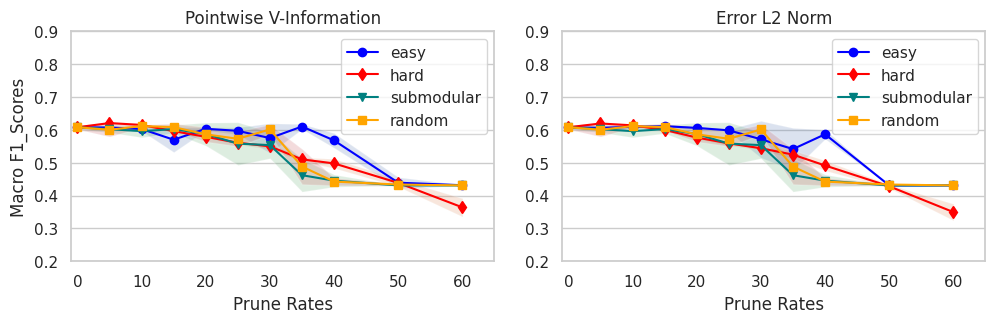

In [22]:
get_plots(pvi_easy_scores_cd, pvi_hard_scores_cd, el2n_easy_scores_cd, el2n_hard_scores_cd, 
          random_scores_cd, submod_scores_cd, fig_name = 'In_Domain', title = 'Macro F1_Scores')

In [18]:
pvi_easy_scores_se, pvi_hard_scores_se = get_scores_inf_score_easy_hard(inf_score = 'pvi', folder_name = 'sexism_eval_f1_scores',
                                                                        type_score = 'macro')
el2n_easy_scores_se, el2n_hard_scores_se = get_scores_inf_score_easy_hard(inf_score = 'el2n', folder_name = 'sexism_eval_f1_scores', 
                                                                          type_score = 'macro')
#vog_easy_scores_se, vog_hard_scores_se = get_scores_inf_score_easy_hard(inf_score = 'vog', folder_name = 'sexism_eval_f1_scores', 
#                                                                       type_score = 'macro')
submod_scores_se = get_scores_submodular(no_prune_folder_name = 'sexism_eval_f1_scores', 
                                         submod_prune_folder_name='~/Influence_Scores/submodular_pruning/sexism_eval_f1_scores',
                                         type_score = 'macro')

In [19]:
random_scores_se = get_random_scores(folder_name = 'sexism_eval_f1_scores',
                                     random_folder_name = '~/Influence_Scores/random_pruning/sexism_eval_f1_scores',
                                     type_score = 'macro')

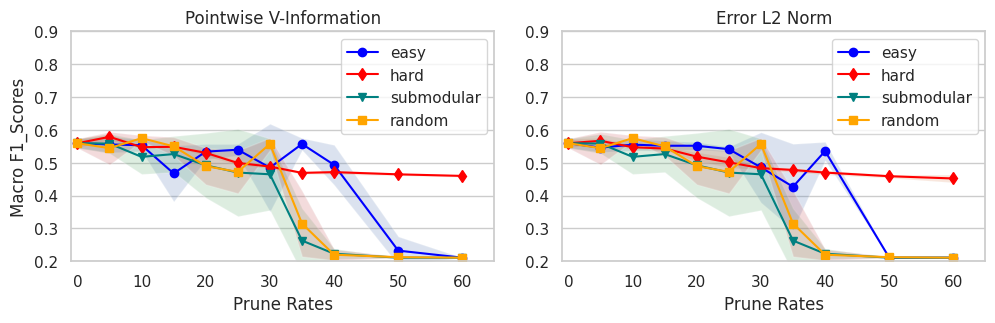

In [20]:
get_plots(pvi_easy_scores_se, pvi_hard_scores_se, el2n_easy_scores_se, el2n_hard_scores_se,
          random_scores_se, submod_scores_se, fig_name = 'sexism_eval', title = 'Macro F1_Scores')

In [21]:
pvi_easy_scores_ood_1, pvi_hard_scores_ood_1 = get_scores_inf_score_easy_hard(inf_score = 'pvi', folder_name = 'ood_1_f1_scores',
                                                                              type_score = 'macro')
el2n_easy_scores_ood_1, el2n_hard_scores_ood_1 = get_scores_inf_score_easy_hard(inf_score = 'el2n', folder_name = 'ood_1_f1_scores',
                                                                                type_score = 'macro')
#vog_easy_scores_ood_1, vog_hard_scores_ood_1 = get_scores_inf_score_easy_hard(inf_score = 'vog', folder_name = 'ood_1_f1_scores', 
#                                                                              type_score = 'macro')
submod_scores_ood_1 = get_scores_submodular(no_prune_folder_name = 'ood_1_f1_scores', 
                                            submod_prune_folder_name='~/Influence_Scores/submodular_pruning/ood_1_f1_scores',
                                            type_score = 'macro')

In [23]:
random_scores_ood_1 = get_random_scores(folder_name = 'ood_1_f1_scores',
                                        random_folder_name='~/Influence_Scores/random_pruning/ood_1_f1_scores',
                                        type_score = 'macro')

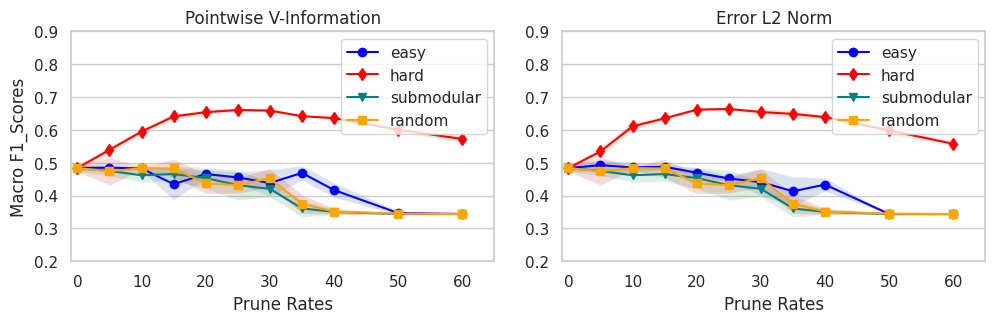

In [24]:
get_plots(pvi_easy_scores_ood_1, pvi_hard_scores_ood_1, el2n_easy_scores_ood_1, el2n_hard_scores_ood_1, 
          random_scores_ood_1, submod_scores_ood_1, fig_name = 'out_of_domain_1', title = 'Macro F1_Scores')

In [25]:
pvi_easy_scores_ood_2, pvi_hard_scores_ood_2 = get_scores_inf_score_easy_hard(inf_score = 'pvi', folder_name = 'ood_2_f1_scores',
                                                                              type_score = 'macro')
el2n_easy_scores_ood_2, el2n_hard_scores_ood_2 = get_scores_inf_score_easy_hard(inf_score = 'el2n', folder_name = 'ood_2_f1_scores',
                                                                                type_score = 'macro')
#vog_easy_scores_ood_2, vog_hard_scores_ood_2 = get_scores_inf_score_easy_hard(inf_score = 'vog', folder_name = 'ood_2_f1_scores',
#                                                                              type_score = 'macro')
submod_scores_ood_2 = get_scores_submodular(no_prune_folder_name = 'ood_2_f1_scores', 
                                            submod_prune_folder_name='~/Influence_Scores/submodular_pruning/ood_2_f1_scores',
                                            type_score = 'macro')

In [26]:
random_scores_ood_2 = get_random_scores(folder_name = 'ood_2_f1_scores', 
                                        random_folder_name = '~/Influence_Scores/random_pruning/ood_2_f1_scores',
                                        type_score = 'macro')

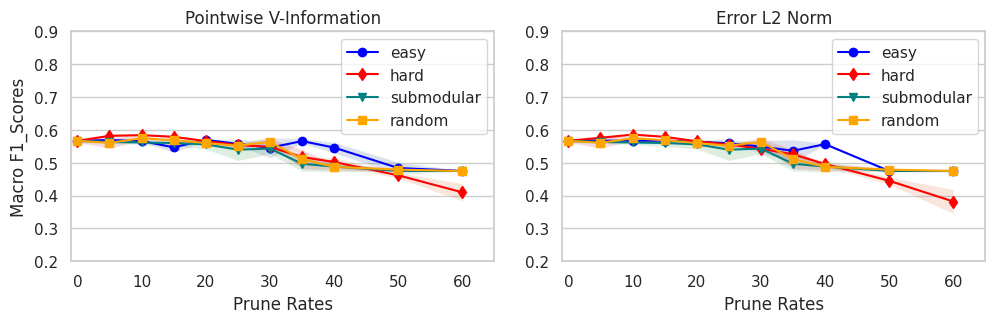

In [27]:
get_plots(pvi_easy_scores_ood_2, pvi_hard_scores_ood_2, el2n_easy_scores_ood_2, el2n_hard_scores_ood_2, 
          random_scores_ood_2, submod_scores_ood_2, fig_name = 'out_of_domain_2', title = 'Macro F1_Scores')